# Naive Bayes

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Loading the preprocessed dataset**

In [2]:
reviews_df = pd.read_csv("preprocessed_data_max.csv")

In [3]:
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean", "compound"]
features = [c for c in reviews_df.columns if c not in ignore_cols]


X = reviews_df[features]
y = reviews_df[label]
 
n_features = X.shape[1]

**Making a split for Validation Dataset**

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42, test_size = 0.2)

**Creating custom MNB Class**

In [5]:
class MNB(object):
    
    def _init_(self):
        self.probailities = None
        self.parameters = None
        self.class_labels = None
    
    def fit(self, X, y, alpha=1.0):
                
        self.class_labels = np.unique(y)
        self.parameters = np.zeros(shape = (X.shape[1], len(self.class_labels)))
        self.probabilities = np.zeros(shape = (len(self.class_labels),))
        
        for ix,label in enumerate(self.class_labels):
            selected_class = (y == label)
    
            token_counts_in_label = []
            for i in range(X.shape[1]):
                temp = 0
                temp += np.sum(X[selected_class, i]) + alpha     
                token_counts_in_label.append(temp)
            
            total_words_in_label = X.shape[1] * alpha
            total_words_in_label += np.sum(X[selected_class,:])
            self.parameters[:, ix] = token_counts_in_label / total_words_in_label
            self.probabilities[ix] = np.sum(selected_class)/len(y)
    
    def predict_log_likelihood(self, X):

        log_parameters = np.log(self.parameters)
        log_likelihoods = np.dot(X, log_parameters)
        for i in range(len(log_likelihoods)):
            for j in range(len(self.probabilities)):
                log_likelihoods[i][j] += np.log(self.probabilities[j])
        return log_likelihoods
            
    def predict(self, X):
        print(self.probabilities)
        log_likelihoods = self.predict_log_likelihood(X)
        label = np.argmax(log_likelihoods, axis=1)
        pred_y = [self.class_labels[index] for index in label]
        
        return pred_y

In [6]:
nbcustom = MNB()

In [7]:
nbcustom.fit(X_train.to_numpy(), y_train.to_numpy())

In [8]:
y1 = nbcustom.predict(X_train.to_numpy())

[0.59630682 0.40369318]


**Training Results**

In [12]:
print(f'Accuracy : {accuracy_score(y_train, y1)}')
print(f'AUC Score : {roc_auc_score(y_train, y1)}')
print(f'F1 Score : {f1_score(y_train, y1)}')
print(f'Precision : {precision_score(y_train, y1)}')
print(f'Recall : {recall_score(y_train, y1)}')

Accuracy : 0.8266477272727273
AUC Score : 0.8134901543209979
F1 Score : 0.7763196480938417
Precision : 0.8101759755164499
Recall : 0.7451794510907811


In [13]:
y2 = nbcustom.predict(X_val.to_numpy())

[0.59630682 0.40369318]


**Validation Results**

In [14]:
print(f'Accuracy : {accuracy_score(y_val, y2)}')
print(f'AUC Score : {roc_auc_score(y_val, y2)}')
print(f'F1 Score : {f1_score(y_val, y2)}')
print(f'Precision : {precision_score(y_val, y2)}')
print(f'Recall : {recall_score(y_val, y2)}')

Accuracy : 0.8232954545454545
AUC Score : 0.811782617531265
F1 Score : 0.7766767198046819
Precision : 0.8090963494913226
Recall : 0.7467550400441867


**Training the dataset on Multinomial Naive Bayes Algorithm from sklearn library**

In [11]:
from sklearn.naive_bayes import MultinomialNB

In [12]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [13]:
y1 = nb.predict(X_train)

In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score,  precision_score, recall_score

**Training Scores**

In [15]:
print(f'Accuracy : {accuracy_score(y_train, y1)}')
print(f'AUC Score : {roc_auc_score(y_train, y1)}')
print(f'F1 Score : {f1_score(y_train, y1)}')
print(f'Precision : {precision_score(y_train, y1)}')
print(f'Recall : {recall_score(y_train, y1)}')

Accuracy : 0.8266477272727273
AUC Score : 0.8134901543209979
F1 Score : 0.7763196480938417
Precision : 0.8101759755164499
Recall : 0.7451794510907811


In [16]:
y2 = nb.predict(X_val)

**Validation scores**

In [17]:
print(f'Accuracy : {accuracy_score(y_val, y2)}')
print(f'AUC Score : {roc_auc_score(y_val, y2)}')
print(f'F1 Score : {f1_score(y_val, y2)}')
print(f'Precision : {precision_score(y_val, y2)}')
print(f'Recall : {recall_score(y_val, y2)}')

Accuracy : 0.8232954545454545
AUC Score : 0.811782617531265
F1 Score : 0.7766767198046819
Precision : 0.8090963494913226
Recall : 0.7467550400441867


**Comparison of Training anf Validation Results**

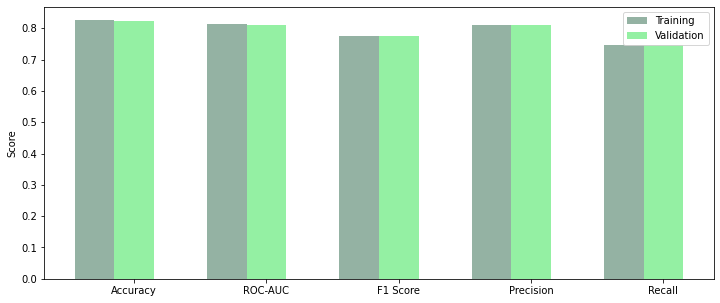

In [15]:
plt.figure(figsize=(12,5))
barWidth = 0.3

bars1 = [accuracy_score(y_train, y1), roc_auc_score(y_train, y1), f1_score(y_train, y1), precision_score(y_train, y1), recall_score(y_train, y1)]
bars2 = [accuracy_score(y_val, y2), roc_auc_score(y_val, y2), f1_score(y_val, y2), precision_score(y_val, y2), recall_score(y_val, y2)]
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.5,0.4,0.6), capsize=7, label='Training')
 
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.9,0.4,0.6), capsize=7, label='Validation')

plt.xticks([r + barWidth for r in range(len(bars1))], ['Accuracy', 'ROC-AUC', 'F1 Score', 'Precision', 'Recall'])
plt.ylabel('Score')
plt.legend(loc = 'best')
 
plt.show()

**Saving stored model**

In [28]:
import joblib
joblib.dump(nb, 'nb.pkl', compress=1) 

['nb.pkl']